In [1]:
import pandas as pd
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('cardata.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
for x in df.iloc[:,5:8]:
    print(df[x].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


<AxesSubplot: xlabel='Fuel_Type', ylabel='count'>

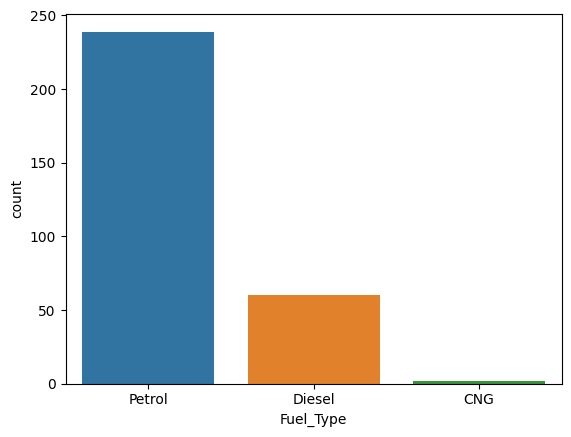

In [5]:
import seaborn as sns
sns.countplot(x='Fuel_Type',data=df)

In [6]:
#drop the row from a column which having the particular element
for x in df.index:
  if df.loc[x,"Fuel_Type"]=='CNG':
    df.drop(x,inplace=True)

In [7]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel'], dtype=object)

In [8]:
df['current_year']=2023

In [9]:
df['no_year']=df['current_year']-df['Year']

In [10]:
df.drop(['Car_Name'],axis=1,inplace=True)

In [11]:
df.drop(['Year'],axis=1,inplace=True)
df.drop(['current_year'],axis=1,inplace=True)


In [12]:
d1=pd.get_dummies(df['Fuel_Type'],drop_first=True) 
d2=pd.get_dummies(df['Seller_Type'],drop_first=True)  
d3=pd.get_dummies(df['Transmission'],drop_first=True)  


In [13]:
df1=pd.concat([df,d1,d2,d3],axis=1)
df=df1

In [14]:
cols=['Fuel_Type','Seller_Type','Transmission']
df=df.drop(columns=cols,axis=1)

In [15]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Petrol,Individual,Manual
0,3.35,5.59,27000,0,9,1,0,1
1,4.75,9.54,43000,0,10,0,0,1
2,7.25,9.85,6900,0,6,1,0,1
3,2.85,4.15,5200,0,12,1,0,1
4,4.60,6.87,42450,0,9,0,0,1


In [16]:
df['Petrol']=df['Petrol'].astype(float)
df['Individual']=df['Individual'].astype(float)
df['Manual']=df['Manual'].astype(float)
df['Kms_Driven']=df['Kms_Driven'].astype(float)
df['Owner']=df['Owner'].astype(float)
df['no_year']=df['no_year'].astype(float)

In [17]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Petrol,Individual,Manual
0,3.35,5.59,27000.0,0.0,9.0,1.0,0.0,1.0
1,4.75,9.54,43000.0,0.0,10.0,0.0,0.0,1.0
2,7.25,9.85,6900.0,0.0,6.0,1.0,0.0,1.0
3,2.85,4.15,5200.0,0.0,12.0,1.0,0.0,1.0
4,4.60,6.87,42450.0,0.0,9.0,0.0,0.0,1.0


In [18]:
df=df.drop(['Owner'],axis=1)

In [19]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,no_year,Petrol,Individual,Manual
0,3.35,5.59,27000.0,9.0,1.0,0.0,1.0
1,4.75,9.54,43000.0,10.0,0.0,0.0,1.0
2,7.25,9.85,6900.0,6.0,1.0,0.0,1.0
3,2.85,4.15,5200.0,12.0,1.0,0.0,1.0
4,4.60,6.87,42450.0,9.0,0.0,0.0,1.0


In [20]:
x=df.drop(['Selling_Price'],axis=1)
y=df['Selling_Price']

In [21]:
x.head()

,Present_Price,Kms_Driven,no_year,Petrol,Individual,Manual
0,5.59,27000.0,9.0,1.0,0.0,1.0
1,9.54,43000.0,10.0,0.0,0.0,1.0
2,9.85,6900.0,6.0,1.0,0.0,1.0
3,4.15,5200.0,12.0,1.0,0.0,1.0
4,6.87,42450.0,9.0,0.0,0.0,1.0


In [22]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [23]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [24]:
print(model.feature_importances_)

[0.39643808 0.04147915 0.07954228 0.14385295 0.25626149 0.08242605]


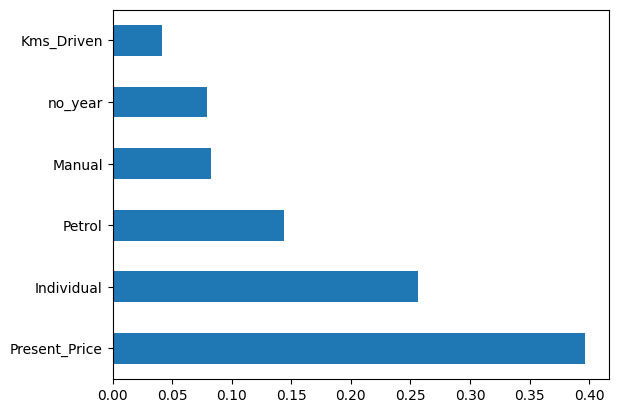

In [25]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression
model12=LinearRegression()
model12.fit(x_train,y_train)

LinearRegression()

In [29]:
print("accuracy is",model12.score(x_test,y_test)*100)

accuracy is 70.78831391370612


In [30]:
from sklearn.ensemble import RandomForestRegressor
model13=RandomForestRegressor()
model13.fit(x_train,y_train)

RandomForestRegressor()

In [31]:
print("accuracy is",model13.score(x_test,y_test)*100)

accuracy is 94.0244332353179


C:\Users\Dell\AppData\Local\Temp\ipykernel_4664\97307450.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<AxesSubplot: xlabel='Selling_Price', ylabel='Density'>

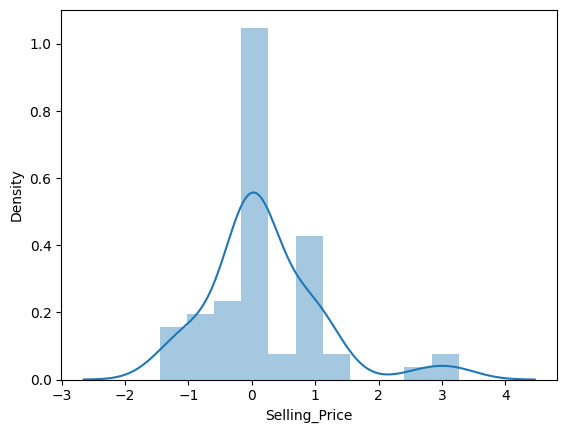

In [32]:
y_pred=model13.predict(x_test)
sns.distplot(y_test-y_pred)

In [33]:
import pickle
file=open("model13.pkl",'wb')
pickle.dump(model13,file)
file.close()